# Titanic Machine Learning

This will be a notebook of my process in building a machine learning model to predict the survivability of passengers on the Titanic. 

### Requirements

In [38]:
# Libraries
import numpy as np
import pandas as pd

In [39]:
# Titanic Spreadsheet
original = pd.read_csv('train.csv')
data = original.copy()
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
# Data Summary
data.shape
print(f"Rows of data: {data.shape[0]}. Features: {data.shape[1]}")

print(data.columns)

data.describe()

Rows of data: 891. Features: 12
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Features 
I decided that the most relevant features that I want to utilize in this analysis are: 
- PClass (ticket class)
- Sex
- Age
- SibSp (# of siblings / spouses aboard the Titanic)
- Parch (# of parents / children aboard the Titanic)
- Fare

PassengerId: will be used to identify passengers in the output.

Survived: is the dependent variable that we are calculating.

Name: is a irrelevant variable to the output in my opinion. Though maybe there could be a case of the linguistics of the name such as a "higher class" name could determine if a person was more wealthy and therefore more likely to survive the Titanic.

Cabin: Is a important feature that we could utilize such as distance to the nearest boat. But, we would need to dive deeper into feature engineering and calulcate distances, requring further research. I wanted to keep this Notebook sweet and simple.

Ticket Number: is most likely insignificant. Unless there is a specific way the ticket number is calulated such as some numbers indicating a higher class ticket. It is an uneeded detail in the feature engineering.


### Dealing with missing data
Missing data is a problem with this data set. Because we need to utilize features from this dataset, we need to make sure that we have a system to process mising values. I decided that I want just put the average of the data for that column in the missing value. For values that are categorical I will leave them "empty" as in putting 0's in all columns for that feature.


In [41]:
# Handle Missing data for PClass
data[pd.isnull(data["Pclass"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [42]:
# Handle Missing data for Sex
data[pd.isnull(data["Sex"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [43]:
# Handle Missing data for Age
print(f"Missing Data for Age: {len(data[pd.isnull(data["Age"])])}")
print(f"Average age: {data.Age.mean()}")
data["Age"] = data.Age.fillna(data.Age.mean())

print(f"Missing Data for Age: {len(data[pd.isnull(data["Age"])])}")

Missing Data for Age: 177
Average age: 29.69911764705882
Missing Data for Age: 0


In [46]:
# Handle Missing data for SibSp
data[pd.isnull(data["SibSp"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [47]:
# Handle Missing values for Parch
data[pd.isnull(data["Parch"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [48]:
# Handle Missing values for Fare
data[pd.isnull(data["Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Great! Now that we have fixed any missing values in our features. Lets engineer our features.

### Feature Engineering

This is how I will be determining our features

PClass: Is either a number between 1 and 3. [1,2,3]. Since this variable doesn't have any missing values. We can utilize 2 dummy values and infer the 3rd value.
PClass_1 : boolean value [0, 1]
PClass_2 : boolean value [0, 1]
PClass_3 : boolean value [0, 1]

Sex: boolean value [0, 1]

Age: Normalized Age. Age can be a large range going from 0 to 80 as showed by the `data.describe()` This means we must normalize the value so we can have a the features be more closely aligned. As a result, we will divide the age by the max Age: 80. 

SibSp: Normalized SibSp.

Parch: Normalized Parch.

Fare: Normalized Fare by the log.

In [52]:
# Get only the features We will be using.

# PClass, Sex, Age, SibSp, Parch, Fare

X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.000000,1,0,7.2500
1,1,female,38.000000,1,0,71.2833
2,3,female,26.000000,0,0,7.9250
3,1,female,35.000000,1,0,53.1000
4,3,male,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000
887,1,female,19.000000,0,0,30.0000
888,3,female,29.699118,1,2,23.4500
889,1,male,26.000000,0,0,30.0000


In [ ]:
pclass_dummies = pd.get_dummies(X['Pclass'], prefix='Pclass')

X.loc[:, 'Pclass_1'] = pclass_dummies['Pclass_1']
X.loc[:, 'Pclass_2'] = pclass_dummies['Pclass_2']

X = X.drop('Pclass', axis=1)

In [63]:
X

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2
0,male,22.000000,1,0,7.2500,False,False
1,female,38.000000,1,0,71.2833,True,False
2,female,26.000000,0,0,7.9250,False,False
3,female,35.000000,1,0,53.1000,True,False
4,male,35.000000,0,0,8.0500,False,False
...,...,...,...,...,...,...,...
886,male,27.000000,0,0,13.0000,False,True
887,female,19.000000,0,0,30.0000,True,False
888,female,29.699118,1,2,23.4500,False,False
889,male,26.000000,0,0,30.0000,True,False


In [68]:
# Age Normalization Feature
X.loc[:, "Age"] = X.loc[:, "Age"] / X.Age.max()
X

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Age1
0,male,0.275000,1,0,7.2500,False,False,0.275000
1,female,0.475000,1,0,71.2833,True,False,0.475000
2,female,0.325000,0,0,7.9250,False,False,0.325000
3,female,0.437500,1,0,53.1000,True,False,0.437500
4,male,0.437500,0,0,8.0500,False,False,0.437500
...,...,...,...,...,...,...,...,...
886,male,0.337500,0,0,13.0000,False,True,0.337500
887,female,0.237500,0,0,30.0000,True,False,0.237500
888,female,0.371239,1,2,23.4500,False,False,0.371239
889,male,0.325000,0,0,30.0000,True,False,0.325000


In [107]:
# SibSp Normalization
# Age Normalization Feature
X["SibSp"] = X["SibSp"].astype(float)

X.loc[:, "SibSp"] = data.loc[:, "SibSp"] / data.SibSp.max()
X

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2
0,1,0.275000,0.125,0.000000,1.981001,False,False
1,0,0.475000,0.125,0.000000,4.266662,True,False
2,0,0.325000,0.000,0.000000,2.070022,False,False
3,0,0.437500,0.125,0.000000,3.972177,True,False
4,1,0.437500,0.000,0.000000,2.085672,False,False
...,...,...,...,...,...,...,...
886,1,0.337500,0.000,0.000000,2.564949,False,True
887,0,0.237500,0.000,0.000000,3.401197,True,False
888,0,0.371239,0.125,0.333333,3.154870,False,False
889,1,0.325000,0.000,0.000000,3.401197,True,False


In [72]:
# Age Normalization Feature
X["Parch"] = X["Parch"].astype(float)

X.loc[:, "Parch"] = X.loc[:, "Parch"] / X.Parch.max()
X

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Age1
0,male,0.275000,0.125,0.000000,7.2500,False,False,0.275000
1,female,0.475000,0.125,0.000000,71.2833,True,False,0.475000
2,female,0.325000,0.000,0.000000,7.9250,False,False,0.325000
3,female,0.437500,0.125,0.000000,53.1000,True,False,0.437500
4,male,0.437500,0.000,0.000000,8.0500,False,False,0.437500
...,...,...,...,...,...,...,...,...
886,male,0.337500,0.000,0.000000,13.0000,False,True,0.337500
887,female,0.237500,0.000,0.000000,30.0000,True,False,0.237500
888,female,0.371239,0.125,0.333333,23.4500,False,False,0.371239
889,male,0.325000,0.000,0.000000,30.0000,True,False,0.325000


In [73]:
# Fare Normalization

# Ensure there are no zero fares to avoid division by zero or negative numbers in log
X.loc[X['Fare'] == 0, 'Fare'] = np.finfo(float).eps # np.finfo(float).eps is the smallest positive float number

# Apply log normalization
X['Fare'] = np.log(X['Fare'])

In [74]:
X

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Age1
0,male,0.275000,0.125,0.000000,1.981001,False,False,0.275000
1,female,0.475000,0.125,0.000000,4.266662,True,False,0.475000
2,female,0.325000,0.000,0.000000,2.070022,False,False,0.325000
3,female,0.437500,0.125,0.000000,3.972177,True,False,0.437500
4,male,0.437500,0.000,0.000000,2.085672,False,False,0.437500
...,...,...,...,...,...,...,...,...
886,male,0.337500,0.000,0.000000,2.564949,False,True,0.337500
887,female,0.237500,0.000,0.000000,3.401197,True,False,0.237500
888,female,0.371239,0.125,0.333333,3.154870,False,False,0.371239
889,male,0.325000,0.000,0.000000,3.401197,True,False,0.325000


In [96]:
X = X.drop("Age1", axis=1) # Drop test feature

In [80]:
X['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
X

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Age1
0,1,0.275000,0.125,0.000000,1.981001,False,False,0.275000
1,0,0.475000,0.125,0.000000,4.266662,True,False,0.475000
2,0,0.325000,0.000,0.000000,2.070022,False,False,0.325000
3,0,0.437500,0.125,0.000000,3.972177,True,False,0.437500
4,1,0.437500,0.000,0.000000,2.085672,False,False,0.437500
...,...,...,...,...,...,...,...,...
886,1,0.337500,0.000,0.000000,2.564949,False,True,0.337500
887,0,0.237500,0.000,0.000000,3.401197,True,False,0.237500
888,0,0.371239,0.125,0.333333,3.154870,False,False,0.371239
889,1,0.325000,0.000,0.000000,3.401197,True,False,0.325000


Now all our features have been engineered!!!

### Traning a model

Now that we have engineered and normalized our features. We will begin making the model.

In [83]:
#Output vector

Y = data.loc[:, 'Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [84]:
print(f"shape of X: {X.shape}")
print(f"shape of Y: {Y.shape}")


shape of X: (891, 8)
shape of Y: (891,)


In [90]:
import torch
import matplotlib.pyplot as plt

In [108]:
# Convert boolean columns to integers
X['Pclass_1'] = X['Pclass_1'].astype(int)
X['Pclass_2'] = X['Pclass_2'].astype(int)

In [111]:
print(X.dtypes)

missing_values = X.isnull().any()
print(missing_values)

print(Y.dtypes)
print(Y.isnull().any())


Sex           int64
Age         float64
SibSp       float64
Parch       float64
Fare        float64
Pclass_1      int32
Pclass_2      int32
dtype: object
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Pclass_1    False
Pclass_2    False
dtype: bool
int64
False


In [112]:
# Convert DataFrames to Numpy Arrays
X_train = X.to_numpy(dtype=np.float32)
Y_train = Y.to_numpy(dtype=np.float32)
print(X_train)

[[1.         0.275      0.125      ... 1.9810015  0.         0.        ]
 [0.         0.475      0.125      ... 4.266662   1.         0.        ]
 [0.         0.325      0.         ... 2.0700223  0.         0.        ]
 ...
 [0.         0.37123898 0.125      ... 3.1548705  0.         0.        ]
 [1.         0.325      0.         ... 3.4011974  1.         0.        ]
 [1.         0.4        0.         ... 2.0476928  0.         0.        ]]


In [113]:
print(X_train.shape)
print(Y_train.shape)


(891, 7)
(891,)


In [115]:
# Defining Dataset class
from torch.utils.data import Dataset, DataLoader

class dataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        self.length = self.x.shape[0]

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    def __len__(self):
        return self.length

trainset = dataset(X_train,Y_train)

#Dataloader
trainloader = DataLoader(trainset, batch_size=64, shuffle=False)

In [138]:
# Defining the network
from torch import nn
from torch.nn import functional as F

class Net(nn.Module):
    def __init__(self, input_shape):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_shape, 32)
        self.fc2 = nn.Linear(32,64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [139]:
# Hyper parameters
learning_rate = 0.01
epochs = 700

# Model, Optimizer, Loss
model = Net(input_shape=X_train.shape[1])
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.BCELoss()

In [140]:
losses = []
accur = []
for i in range(epochs):
    epoch_loss = 0
    for j, (x_train, y_train) in enumerate(trainloader):
        # Calculate output
        output = model(x_train)
        
        # Calculate loss
        loss = loss_fn(output.squeeze(), y_train)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    if i % 50 == 0:
        # Calculate accuracy outside the batch loop, less frequently
        with torch.no_grad():
            predicted = model(torch.tensor(X_train, dtype=torch.float32)).reshape(-1).detach().numpy().round()
            acc = (predicted == Y_train).mean()
            print(f"Epoch {i}\tLoss: {epoch_loss / len(trainloader)}\tAccuracy: {acc}")
            losses.append(epoch_loss / len(trainloader))
            accur.append(acc)


Epoch 0	Loss: 0.7142666365419116	Accuracy: 0.2839506172839506
Epoch 50	Loss: 0.5421495991093772	Accuracy: 0.7631874298540965
Epoch 100	Loss: 0.4683468682425363	Accuracy: 0.7856341189674523
Epoch 150	Loss: 0.4596514808280127	Accuracy: 0.7822671156004489
Epoch 200	Loss: 0.4538968971797398	Accuracy: 0.7833894500561167
Epoch 250	Loss: 0.44853651097842623	Accuracy: 0.7845117845117845
Epoch 300	Loss: 0.4443886514220919	Accuracy: 0.7890011223344556
Epoch 350	Loss: 0.44072365547929493	Accuracy: 0.7934904601571269
Epoch 400	Loss: 0.4380453314099993	Accuracy: 0.8035914702581369
Epoch 450	Loss: 0.4357997604778835	Accuracy: 0.8047138047138047
Epoch 500	Loss: 0.43390150581087383	Accuracy: 0.8035914702581369
Epoch 550	Loss: 0.432211126599993	Accuracy: 0.8069584736251403
Epoch 600	Loss: 0.43071348539420534	Accuracy: 0.8069584736251403
Epoch 650	Loss: 0.4294403280530657	Accuracy: 0.8069584736251403


Text(0, 0.5, 'loss')

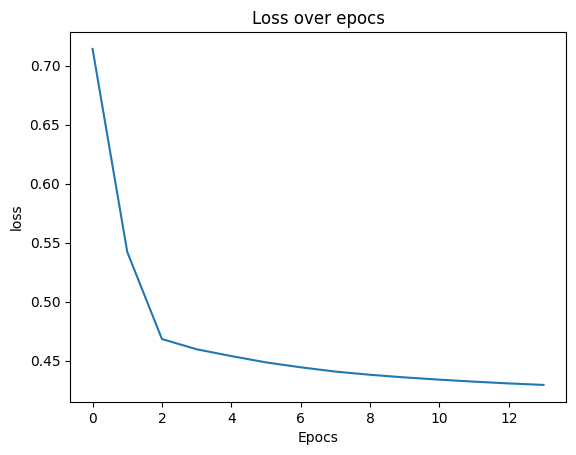

In [142]:
plt.plot(losses)
plt.title('Loss over epocs')
plt.xlabel('Epocs')
plt.ylabel('loss')


After a running through a training loop of 700 Epochs, we reach an accuracy of 80%! That's pretty good. Now lets try using the model on the test data and submit a submission.

### Running through test data

In [158]:
# Import Data
test_original_data = pd.read_csv('test.csv')
test_data = test_original_data.copy()

In [159]:
# Data Summary
test_data.shape

print(test_data.dtypes)
missing_values = test_data.isnull().any()
print(missing_values)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool


### Feature Engineer our Test Set

In [160]:
test_data = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,NaN,0,0,8.0500


In [161]:
# Handle Missing data for Age
test_data["Age"] = test_data.Age.fillna(test_data.Age.mean())
test_data["Fare"] = test_data.Fare.fillna(test_data.Fare.mean())

In [162]:
# Data Summary
test_data.shape

print(test_data.dtypes)
missing_values = test_data.isnull().any()
print(missing_values)

Pclass      int64
Sex        object
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object
Pclass    False
Sex       False
Age       False
SibSp     False
Parch     False
Fare      False
dtype: bool


In [163]:
#Pclass
pclass_dummies = pd.get_dummies(test_data['Pclass'], prefix='Pclass')

test_data.loc[:, 'Pclass_1'] = pclass_dummies['Pclass_1']
test_data.loc[:, 'Pclass_2'] = pclass_dummies['Pclass_2']
test_data['Pclass_1'] = test_data['Pclass_1'].astype(int)
test_data['Pclass_2'] = test_data['Pclass_2'].astype(int)

test_data = test_data.drop('Pclass', axis=1)

# Age Normalization Feature
test_data.loc[:, "Age"] = test_data.loc[:, "Age"] / data.Age.max()

# SibSp Normalization
test_data["SibSp"] = test_data["SibSp"].astype(float)
test_data.loc[:, "SibSp"] = test_data.loc[:, "SibSp"] / data.SibSp.max()

# Parch Normalization Feature
test_data["Parch"] = test_data["Parch"].astype(float)

test_data.loc[:, "Parch"] = test_data.loc[:, "Parch"] / data.Parch.max()

# Fare Normalization
# Ensure there are no zero fares to avoid division by zero or negative numbers in log
test_data.loc[test_data['Fare'] == 0, 'Fare'] = np.finfo(float).eps # np.finfo(float).eps is the smallest positive float number

# Apply log normalization
test_data['Fare'] = np.log(test_data['Fare'])

# Sex
test_data['Sex'] = test_data['Sex'].map({'male': 1, 'female': 0})

test_data

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2
0,1,0.431250,0.000,0.000000,2.057860,0,0
1,0,0.587500,0.125,0.000000,1.945910,0,0
2,1,0.775000,0.000,0.000000,2.270836,0,1
3,1,0.337500,0.000,0.000000,2.159003,0,0
4,0,0.275000,0.125,0.166667,2.508582,0,0
...,...,...,...,...,...,...,...
413,1,0.378407,0.000,0.000000,2.085672,0,0
414,0,0.487500,0.000,0.000000,4.690430,1,0
415,1,0.481250,0.000,0.000000,1.981001,0,0
416,1,0.378407,0.000,0.000000,2.085672,0,0


### Training loop on Test Data

In [171]:
import torch

# Ensure the model is in evaluation mode
model.eval()

# Convert X_test to a PyTorch tensor
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Get predictions
with torch.no_grad():  # Context manager that disables gradient calculation
    predictions = model(X_test_tensor)

predictions_numpy = predictions.detach().numpy()
predictions_numpy = predictions_numpy.flatten()
predictions_numpy

array([0.10306004, 0.3658032 , 0.10791093, 0.12010305, 0.5448806 ,
       0.16388373, 0.57465786, 0.20904112, 0.6695293 , 0.11309628,
       0.11152079, 0.35656354, 0.97226024, 0.09244954, 0.93494624,
       0.908045  , 0.19229989, 0.13573922, 0.52326447, 0.44340795,
       0.27837217, 0.18723059, 0.9677679 , 0.5709531 , 0.91561836,
       0.06153563, 0.97478265, 0.13116588, 0.40546834, 0.08835273,
       0.1263594 , 0.20572932, 0.4321281 , 0.4635474 , 0.46195936,
       0.14366618, 0.5758104 , 0.6568095 , 0.12693277, 0.14234854,
       0.08522194, 0.48574802, 0.09102513, 0.90217984, 0.9368362 ,
       0.12478338, 0.37199482, 0.11181874, 0.9305887 , 0.47138304,
       0.51282537, 0.24330227, 0.864564  , 0.93120754, 0.22434601,
       0.09381031, 0.10195795, 0.12439692, 0.10072143, 0.97631365,
       0.14978911, 0.21019757, 0.14619592, 0.6423026 , 0.533358  ,
       0.91149354, 0.6743633 , 0.3767977 , 0.48421967, 0.85498756,
       0.6265637 , 0.13678859, 0.58578575, 0.5034243 , 0.97594

In [172]:
# Applying a threshold of 0.5 to convert probabilities to binary classes
binary_predictions = (predictions_numpy >= 0.5).astype(int)
binary_predictions


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [175]:
#Save into a csv
passenger_ids = test_original_data['PassengerId']

submission_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': binary_predictions
})

submission_df.to_csv('submission.csv', index=False)

![Screenshot](submission_score.png "This was the Kaggle Score 0.75837")


We got a 75% Accuracy! Not bad for a 1 Layer Neural Network!

### What I learned and Next Steps

I have been studying Deep Learning for the past few months and this was my first time doing a Kaggle Competition.
What I learned the most while doing this Kaggle Competition is the importance of processing your data and feature engineering. The bulk of the work was making sure we fill any empty data, engineering our features, and processing them into a tensor to be put into the model. This notebook gave me insights in areas where I am lacking in the data processing pipeline of building models. I spent alot of my time learning about different architectures and not in a practical enviornment working with the data and processing it. It was actually a big weakness in my knowledge and now that I have worked on this notebook I am feeling confident and motivated to keep working and learning more about practical machine learning.

Next steps for this specific model: It would be benificial to upgrade the neural network by adding more hidden layers allowing for my complex patterns to be recognized in the data. Along with that, the feature engineering was a bit lazy. We only normalized the data the maximum of the training data or we calulated the average of data and inserted it into empty slots. If we could add a little more thought into the processing of the empty data slots we could get more accurate predicitons of the missing data. Along with that, we could definitely add more features such as the cabins. But rather than the cabins, we take the distance from their cabin to the nearest life boats on the Titanic. That could be a big indicator for their survivability on the Titanic. These are all different ways we could improve the accuracy of our model.